Example comes from: <br>
https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# use a preferred style set
plt.style.use('ggplot')

# install faker --> pip install faker
# import faker
from faker import Faker
fake = Faker()
# to ensure reproducibility
Faker.seed(4321)
# fake.seed in example doesn't work, get error saying that it is deprecated for instances

In [2]:
names_list = []
fake = Faker()
for _ in range(100):
    names_list.append(fake.name())

names_list[0:5]

['Jason Brown',
 'Jacob Stein',
 'Cody Brown',
 'Larry Morales',
 'Jessica Hendricks']

In [3]:
# to ensure reproducibility of results
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000, 2500)
    salaries.append(salary)

salaries[0:5]

[1175, 2220, 1537, 1502, 1211]

In [4]:
# create a pandas dataframe
salary_df = pd.DataFrame({'person':names_list, 'salary':salaries})
salary_df.head()

,person,salary
0,Jason Brown,1175
1,Jacob Stein,2220
2,Cody Brown,1537
3,Larry Morales,1502
4,Jessica Hendricks,1211


In [5]:
# lets manually change some of the salary entries
salary_df.at[16, 'salary'] = 23
print(salary_df.loc[16])

person    Miss Amanda Harris MD
salary                       23
Name: 16, dtype: object


In [6]:
salary_df.at[65, 'salary'] = 17
print(salary_df.loc[65])

person    Joyce Bishop
salary              17
Name: 65, dtype: object


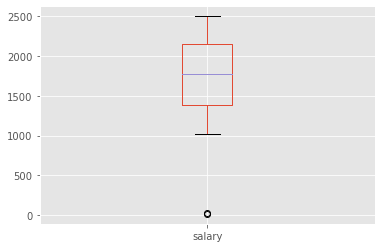

In [7]:
# outlier shown in boxplot
salary_df['salary'].plot(kind='box')
plt.show()

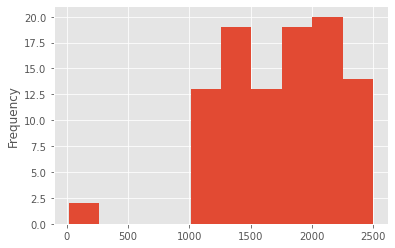

In [8]:
# outlier shown in histogram
salary_df['salary'].plot(kind='hist')
plt.show()

In [9]:
print('Minimum salary ' + str(salary_df.salary.min()))
print('Maximum salary ' + str(salary_df.salary.max()))

Minimum salary 17
Maximum salary 2498


In [10]:
# convert the salary values into a numpy array
salary_raw = salary_df['salary'].values
salary_raw

array([1175, 2220, 1537, 1502, 1211, 1919, 2372, 2209, 2422, 1535, 1345,
       1366, 1554, 1730, 1904, 2191,   23, 2456, 1391, 1940, 2099, 1823,
       1250, 2030, 2468, 2068, 2349, 2176, 1183, 1949, 2136, 1763, 2213,
       1290, 1312, 1201, 2486, 1550, 1772, 1494, 2161, 2219, 2096, 1944,
       1257, 1400, 2398, 2373, 1940, 1604, 1764, 1279, 1745, 1803, 2472,
       2341, 2415, 2175, 1092, 1759, 2248, 1356, 1931, 1481, 1579,   17,
       1481, 2043, 1923, 1787, 1033, 2147, 2310, 1741, 1989, 2439, 2154,
       2107, 1402, 1021, 1203, 1047, 1784, 1524, 1349, 1107, 1393, 1844,
       1622, 1654, 1636, 1276, 1309, 1827, 1035, 1260, 1456, 2498, 2007,
       2239])

In [11]:
# reshape for compatibility with SciPi
# the -1 for reshape means use as many rows as needed (-1 means last number i.e. 100), 
# the 1 means one column
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')
salary_raw

array([[1175.],
       [2220.],
       [1537.],
       [1502.],
       [1211.],
       [1919.],
       [2372.],
       [2209.],
       [2422.],
       [1535.],
       [1345.],
       [1366.],
       [1554.],
       [1730.],
       [1904.],
       [2191.],
       [  23.],
       [2456.],
       [1391.],
       [1940.],
       [2099.],
       [1823.],
       [1250.],
       [2030.],
       [2468.],
       [2068.],
       [2349.],
       [2176.],
       [1183.],
       [1949.],
       [2136.],
       [1763.],
       [2213.],
       [1290.],
       [1312.],
       [1201.],
       [2486.],
       [1550.],
       [1772.],
       [1494.],
       [2161.],
       [2219.],
       [2096.],
       [1944.],
       [1257.],
       [1400.],
       [2398.],
       [2373.],
       [1940.],
       [1604.],
       [1764.],
       [1279.],
       [1745.],
       [1803.],
       [2472.],
       [2341.],
       [2415.],
       [2175.],
       [1092.],
       [1759.],
       [2248.],
       [1356.],
       [

In [12]:
# import kmeans from SciPi
from scipy.cluster.vq import kmeans
from scipy import cluster

# specify the data and the number of clusters to kmeans
centroids, avg_distance = kmeans(salary_raw, 4)

In [13]:
# get the groups (clusters) and distances
groups, cdist = cluster.vq.vq(salary_raw, centroids)

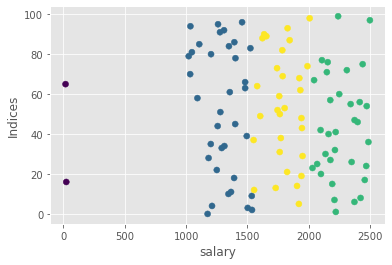

In [14]:
# plot the groups that we got
plt.scatter(salary_raw, np.arange(0, 100), c=groups)
plt.xlabel('salary')
plt.ylabel('Indices')
plt.show()

### Lets redo this as a supervised learning classification problem

In [15]:
# first assign all the instances to 0
salary_df['class'] = 0

# manually create the anomalies
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1

# verify
print(salary_df.loc[16])

person    Miss Amanda Harris MD
salary                       23
class                         1
Name: 16, dtype: object


In [16]:
salary_df.head()

,person,salary,class
0,Jason Brown,1175,0
1,Jacob Stein,2220,0
2,Cody Brown,1537,0
3,Larry Morales,1502,0
4,Jessica Hendricks,1211,0


In [17]:
# pip install pyod
# importing KNN module from PyOD
from pyod.models.knn import KNN

In [20]:
# segregate the salary values and class labels
x = salary_df.salary.values.reshape(-1, 1)
y = salary_df['class'].values

# train the KNN
# contamination: the percentage of anomalies in the data
# n_neighbors: the number of neighbors to consider for measuring proximity
clf = KNN(contamination=0.02, n_neighbors=5)
clf.fit(x)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [21]:
# get the predictions of the training data
y_train_pred = clf.labels_

# outlier scores
y_train_scores = clf.decision_scores_

In [22]:
# import the utility function for model evaluation
from pyod.utils import evaluate_print

# evaluate the training data
evaluate_print('KNN', y, y_train_scores)

KNN ROC:1.0, precision @ rank n:1.0


In [23]:
# lets test the model
# a salary of 37 is an anomaly
X_test = np.array([[37.]])
X_test

array([[37.]])

In [24]:
# check what the model predicts on the test data point
clf.predict(X_test)

array([1])

In [25]:
# a salary of 1256 should be normal
X_test_normal = np.array([[1256.]])

# predict
clf.predict(X_test_normal)

array([0])